## Streamlit

In [1]:
# !pip install streamlit

     ---------------------------------------- 9.6/9.6 MB 7.8 MB/s eta 0:00:00
     -------------------------------------- 813.6/813.6 kB 8.5 MB/s eta 0:00:00
     ------------------------------------- 184.3/184.3 kB 11.6 MB/s eta 0:00:00
     ---------------------------------------- 238.7/238.7 kB ? eta 0:00:00
     ---------------------------------------- 20.6/20.6 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 164.8/164.8 kB 5.0 MB/s eta 0:00:00
     -------------------------------------- 904.0/904.0 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 62.7/62.7 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 4.2 MB/s eta 0:00:00
     ------------------------

In [28]:
import streamlit as st
import pandas as pd


# import the libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
import yfinance as yf
import datetime

In [30]:
df = yf.download(tickers='UBER', period='5d', interval='5m')

[*********************100%***********************]  1 of 1 completed


In [31]:
stock_dict = df["High"].to_dict().items()

In [32]:
schema = {
    "time": [],
    "price": [],
    "moving_avg": []
}
df = pd.DataFrame(schema)

In [33]:
for d in stock_dict:
    data = (d[0].strftime('%Y-%m-%d %H:%M:%S'), d[1])
    df.loc[len(df.index)] = [d[0], d[1], None]
    print(df)
    break

                       time      price moving_avg
0 2023-03-27 09:30:00-04:00  31.040001       None


In [54]:
print(df["price"].get(len(df)-2, 0))

0


In [5]:
st.set_page_config(
    page_title = 'Real-Time Data Science Dashboard',
    layout = 'wide'
)
st.title("Real-Time / Live Data Science Dashboard")

2023-04-02 15:23:14.106 
  command:

    streamlit run C:\Users\Futurense\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [6]:
placeholder = st.empty()

In [ ]:

import time
for d in stock_dict:
#while True: 
    
    price = d[1]

    # creating rolling avg
    roll_avg = 0
    if len(df) >= 5:
        roll_avg = df.iloc[-5:, -1].mean()
        
    df.loc[len(df.index)] = [d[0], d[1], roll_avg]

    with placeholder.container():
        # create three columns
        kpi1, kpi2 = st.columns(2)

        # fill in those three columns with respective metrics or KPIs 
#         kpi1.metric(label="Price: ", value=price, delta= price - df["price"].get(-2))
        kpi2.metric(label="Price: ", value=round(price, 2))
        kpi2.metric(label="Rolling_Avg", value= roll_avg)
        
        st.markdown("Stock Graph with Moving average")
            
        fig = plt.figure(figsize=(9,6))
        # Time series plot with Seaborn lineplot()
        sns.lineplot(x"time", y="price",data=df, ci=None)
        sns.lineplot(x="time", y="moving_avg",data=df, ci=None)
        # axis labels
        plt.xlabel("Date", size=14)
        plt.ylabel("Price", size=14)
        # save image as PNG file
        plt.savefig("Stock_Price_Chart.png",
                            format='png',
                            dpi=150)
        st.pyplot(fig)
        
        st.markdown("Stock Graph with Moving average")
        
        st.markdown("### Detailed Data View")
        st.dataframe(df.iloc[-5:])
        time.sleep(1)

## Without Streamlit

In [1]:
import yfinance as yf
import datetime

import pandas as pd

# import the libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = yf.download(tickers='UBER', period='1d', interval='1m')

[*********************100%***********************]  1 of 1 completed


In [3]:
stock_dict = df["High"].to_dict().items()

In [4]:
schema = {
    "time": [],
    "price": [],
    "moving_avg": []
}
df = pd.DataFrame(schema)

NameError: name 'time' is not defined

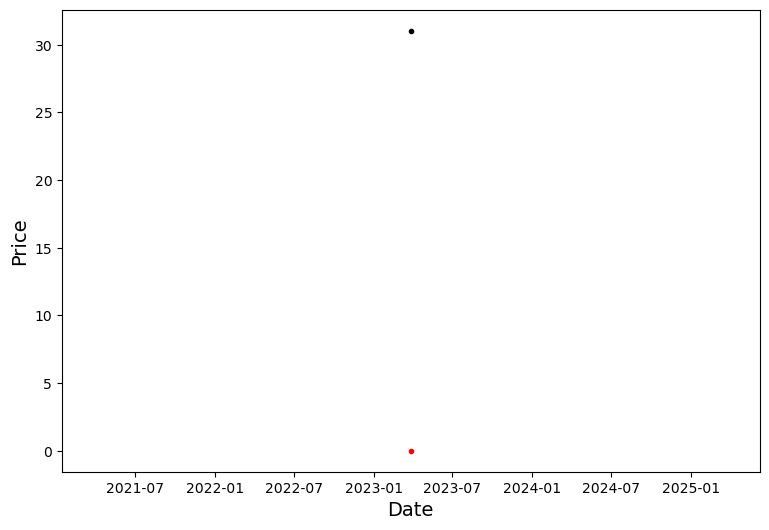

In [5]:
for d in stock_dict:
#while True: 
    
    price = d[1]

    # creating rolling avg
    roll_avg = 0
    if len(df) >= 5:
        roll_avg = df["price"].iloc[-5:].mean()
        
    df.loc[len(df.index)] = [d[0], d[1], roll_avg]
    
    fig = plt.figure(figsize=(9,6))
    # Time series plot with Seaborn lineplot()
    plt.plot(df["time"], df["price"], 'k.-', label='Original data')
    plt.plot(df["time"], df["moving_avg"], 'r.-', label='Running average')
    # axis labels
    plt.xlabel("Date", size=14)
    plt.ylabel("Price", size=14)
    # save image as PNG file
    plt.savefig("Stock_Price_Chart.png", format='png', dpi=150) 
    time.sleep(5)
    plt.close()